### **Data Collection and Pre-processing from the ChEMBL Database - bioactivity data**

ChEMBL database - contains curated bioactivity data of more than 2 million compounds.

In [1]:
#installing libraries
#Install the ChEMBL web service package to retrieve bioactivity data from the ChEMBL Database.

# !pip uninstall chembl_webresource_client -y
!pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.8 MB/s eta 0:00:00


In [2]:
#importing required libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
import sklearn
print(sklearn.__version__)

1.5.2


**Search for Target Protein**


Here, the target search for Acetylcholinesterase.

 Acetylcholinesterase is an enzyme that hydrolyzes one of the main neurotransmitter acetylcholine into choline and acetic acid residue. In clinical practice, increasing the level of acetylcholinesterase is an important remedy for the treatment of Alzheimer's disease. Food and Drug Administration has also approved acetylcholinesterase inhibitors as a clinical treatment for patients. [Reference](https://www.sciencedirect.com/topics/pharmacology-toxicology-and-pharmaceutical-science/acetylcholinesterase)


In [4]:
#target search for Acetylcholinesterase
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets.head()

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,28.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,28.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
4,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539


In [5]:
#Select and retrieve bioactivity data for Human Acetylcholinesterase (first entry)
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL220'

In [6]:
#retrieve only bioactivity data for Human Acetylcholinesterase (CHEMBL220) that are reported as pChEMBL values.
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [7]:
df = pd.DataFrame.from_dict(res)
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8


**IC50 - half maximal inhibitory concentration - measure of a drug's efficacy.**
**It indicates how much drug is needed to inhibit a biological process by half, thus providing a measure of potency of an antagonist drug in pharmacological research.**

*Standard_value - potency of the drug. Lower the value, better the potency of the drug becomes*

potency - means concentration/dose of the drug required to produce a specific effect

In [8]:
#save bioactivity data as a csv file
df.to_csv("acetylcholineestrase_bioactivity_data_raw.csv", index=False)

In [9]:
df['standard_value'].isnull().sum()

1283

In [10]:
df['canonical_smiles'].isnull().sum()

35

In [11]:
len(df)

9091

In [12]:
#handling missing data
#compunds missing standard_value or canonical_smiles are removed
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2.head()

<ipython-input-12-55b184a45521>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8


In [13]:
len(df2.canonical_smiles.unique())

6369

In [14]:
df.shape

(9091, 46)

In [15]:
#drop duplicates - canonical smiles
df2 = df2.drop_duplicates(['canonical_smiles'])
df2.shape

(6369, 46)

In [16]:
df2.isnull().sum()

,0
action_type,5254
activity_comment,6309
activity_id,0
activity_properties,0
assay_chembl_id,0
assay_description,0
assay_type,0
assay_variant_accession,6369
assay_variant_mutation,6369
bao_endpoint,0


No duplicates

In [17]:
#subset of the data - molecule_chembl_id,canonical_smiles,standard_value
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0


In [18]:
df3.shape

(6369, 3)

In [19]:
#save this as a csv file
df3.to_csv("acetylcholineestrase_bioactivity_data_preprocessed.csv", index=False)

In [20]:
#labeling compounds as active or inactive or intermediate
bioactivity_class = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [21]:
len(bioactivity_class)

6369

Compounds having values of less than 1000 nM will be considered to be active while those greater than 10,000 nM will be considered to be inactive. As for those values in between 1,000 and 10,000 nM will be referred to as intermediate.

In [22]:
# Make sure both df3 and bioactivity_class have the same index
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class', index=df3.index)
df4 = pd.concat([df3, bioactivity_class], axis=1)
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active


In [23]:
df4.tail()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
9086,CHEMBL2238282,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,160.0,active
9087,CHEMBL4636881,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,7943.28,intermediate
9088,CHEMBL4635134,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,100000.0,inactive
9089,CHEMBL4639128,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,63095.73,inactive
9090,CHEMBL5078078,CC(C)(O)c1ccc(N2Cc3c(ccnc3-c3ccc(F)cc3OCC(F)(F...,10000.0,inactive


In [24]:
len(df4)

6369

In [25]:
df4.isnull().sum()

,0
molecule_chembl_id,0
canonical_smiles,0
standard_value,0
bioactivity_class,0


In [26]:
#save this df as a csv file
df4.to_csv("acetylcholineestrase_bioactivity_data_curated.csv", index=False)

### **Exploratory Data Analysis and Descriptor Calculation**

In [27]:
df4_no_smiles = df4.drop(columns='canonical_smiles')
df4_no_smiles.head()

,molecule_chembl_id,standard_value,bioactivity_class
0,CHEMBL133897,750.0,active
1,CHEMBL336398,100.0,active
2,CHEMBL131588,50000.0,inactive
3,CHEMBL130628,300.0,active
4,CHEMBL130478,800.0,active


In [28]:
len(df4_no_smiles)

6369

In [29]:
smiles = []
for i in df4.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)
smiles = pd.Series(smiles, name = 'canonical_smiles', index=df4.index)
len(smiles)

6369

In [30]:
df_clean_smiles = pd.concat([df4_no_smiles,smiles], axis=1)
df_clean_smiles.head()

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C


In [31]:
len(df_clean_smiles)

6369

**Calculate Lipinski Descriptors**

For evaluating drug likeliness compounds based on Absorption, Distribution, Metabolism and Excretion (ADME) - also known as pharmcokinetic profile.

Lipinski's Rule of 5:

*   Molecular weight < 500 Dalton
*   Octanol-water partition coefficient (LogP) < 5
*   Hydrogen bond donors < 5
*   Hydrogen bond acceptors < 10





In [32]:
# Download and install Miniconda
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

# Update conda and install mamba
! /usr/local/bin/conda update -n base -c defaults conda -y
! /usr/local/bin/conda install -n base -c conda-forge mamba -y

# Create a new environment with a specific compatible RDKit version and Python 3.10
! /usr/local/bin/mamba create -n myenv -c conda-forge rdkit=2023.3.1 python=3.10 -y

# Activate the environment and add to the system path
import sys
sys.path.append('/usr/local/envs/myenv/lib/python3.10/site-packages/')

# Verify RDKit installation
from rdkit import Chem
print("RDKit version:", Chem.rdBase.rdkitVersion)

--2024-10-28 01:42:01--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148337011 (141M) [application/octet-stream]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>] 141.46M  97.9MB/s    in 1.4s    

2024-10-28 01:42:02 (97.9 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [148337011/148337011]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONP

In [33]:
#import required libraries
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Lipinski as RDKit_Lipinski  # Alias to avoid conflict

import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Function to calculate Lipinski descriptors
def lipinski(smiles, verbose=False):
    moldata = []
    for elem in smiles:
        if pd.notnull(elem):  # Check for NaN values
            mol = Chem.MolFromSmiles(elem)
            if mol is not None:  # Check for valid SMILES
                moldata.append(mol)

    baseData = np.empty((0, 4))
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = RDKit_Lipinski.NumHDonors(mol)  # Use the alias
        desc_NumHAcceptors = RDKit_Lipinski.NumHAcceptors(mol)  # Use the alias

        row = np.array([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])
        baseData = np.vstack([baseData, row])

    columnNames = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors

In [35]:
df_clean_smiles.isnull().sum()

,0
molecule_chembl_id,0
standard_value,0
bioactivity_class,0
canonical_smiles,0


In [36]:
# Calculate Lipinski descriptors
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0


In [37]:
len(df_lipinski)

6369

In [38]:
# Reset indices to ensure proper alignment
df_clean_smiles_reset = df_clean_smiles.reset_index(drop=True)
df_lipinski_reset = df_lipinski.reset_index(drop=True)

#combine dataframe
df_combined = pd.concat([df_clean_smiles_reset, df_lipinski_reset], axis=1)
df_combined.head()

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0


In [39]:
len(df_combined)

6369

Convert IC50 to pIC50


To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

In [40]:
df_clean_smiles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6369 entries, 0 to 9090
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  6369 non-null   object
 1   standard_value      6369 non-null   object
 2   bioactivity_class   6369 non-null   object
 3   canonical_smiles    6369 non-null   object
dtypes: object(4)
memory usage: 248.8+ KB


In [41]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6369 entries, 0 to 6368
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  6369 non-null   object 
 1   standard_value      6369 non-null   object 
 2   bioactivity_class   6369 non-null   object 
 3   canonical_smiles    6369 non-null   object 
 4   MW                  6369 non-null   float64
 5   LogP                6369 non-null   float64
 6   NumHDonors          6369 non-null   float64
 7   NumHAcceptors       6369 non-null   float64
dtypes: float64(4), object(4)
memory usage: 398.2+ KB


In [42]:
# Convert standard_value from object to float
df_combined['standard_value'] = pd.to_numeric(df_combined['standard_value'], errors='coerce')

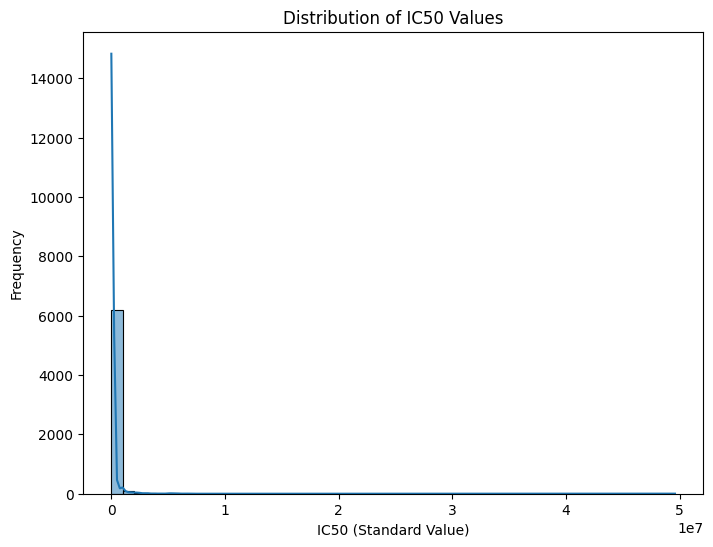

In [43]:
#see the distribution of IC50
# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(df_combined['standard_value'], bins=50, kde=True)  # kde adds a smooth curve
# plt.ylim(0, 50)
plt.title('Distribution of IC50 Values')
plt.xlabel('IC50 (Standard Value)')
plt.ylabel('Frequency')
plt.show()

In [44]:
""" Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10
Take the molar value and apply -log10
Delete the standard_value column and create a new pIC50 column
"""
def pIC50(input):
    pIC50 = []

    # Iterate over the 'standard_value_norm' column
    for i in input['standard_value_norm']:
        if i > 0:  # Ensure the value is greater than 0 to avoid divide-by-zero errors
            molar = i * (10**-9)  # Convert nM to M
            pIC50.append(-np.log10(molar))  # Calculate -log10(M)
        else:
            pIC50.append(np.nan)

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)

    return x

In [45]:
df_combined.standard_value.describe()

,standard_value
count,6.369000e+03
mean,1.032539e+05
std,9.065149e+05
min,0.000000e+00
25%,1.445000e+02
50%,2.260000e+03
75%,1.580000e+04
max,4.960000e+07


In [46]:
#Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)

    return x

In [47]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.80320,0.0,6.0,750.00
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.55460,0.0,5.0,100.00
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.35740,0.0,5.0,50000.00
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.70690,0.0,5.0,300.00
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.09530,0.0,6.0,800.00
...,...,...,...,...,...,...,...,...
6364,CHEMBL2238282,active,O=C(/C=C/c1ccc(N2CCCCC2)cc1)c1sccc1Cl,331.868,5.28790,0.0,3.0,160.00
6365,CHEMBL4636881,intermediate,CC(=O)Nc1c(F)cc(C(=O)N[C@H]2CC[C@H](O)CC2)cc1O...,414.477,3.95740,3.0,4.0,7943.28
6366,CHEMBL4635134,inactive,CNC(=O)c1cc(C(=O)NC2CC2)cn(Cc2ccccc2)c1=O,325.368,1.14840,2.0,4.0,100000.00
6367,CHEMBL4639128,inactive,COCc1nc2cnc3cc(-c4c(C)noc4C)c(OC[C@H]4CCNC4)cc...,511.626,5.60034,1.0,8.0,63095.73


In [48]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6369 entries, 0 to 6368
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   molecule_chembl_id   6369 non-null   object 
 1   bioactivity_class    6369 non-null   object 
 2   canonical_smiles     6369 non-null   object 
 3   MW                   6369 non-null   float64
 4   LogP                 6369 non-null   float64
 5   NumHDonors           6369 non-null   float64
 6   NumHAcceptors        6369 non-null   float64
 7   standard_value_norm  6369 non-null   float64
dtypes: float64(5), object(3)
memory usage: 398.2+ KB


In [49]:
df_norm.isnull().sum()

,0
molecule_chembl_id,0
bioactivity_class,0
canonical_smiles,0
MW,0
LogP,0
NumHDonors,0
NumHAcceptors,0
standard_value_norm,0


In [50]:
df_norm = df_norm.dropna()
df_norm.isnull().sum()

,0
molecule_chembl_id,0
bioactivity_class,0
canonical_smiles,0
MW,0
LogP,0
NumHDonors,0
NumHAcceptors,0
standard_value_norm,0


In [51]:
df_final = pIC50(df_norm)
df_final.head()

,molecule_chembl_id,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910


In [52]:
df_final.pIC50.describe()

,pIC50
count,6368.000000
mean,5.835635
std,1.559681
min,1.304518
25%,4.801007
50%,5.644933
75%,6.839007
max,14.301030


In [53]:
df_final.isna().sum()

,0
molecule_chembl_id,0
bioactivity_class,0
canonical_smiles,0
MW,0
LogP,0
NumHDonors,0
NumHAcceptors,0
pIC50,1


In [54]:
df_final = df_final.dropna()
df_final.isna().sum()

,0
molecule_chembl_id,0
bioactivity_class,0
canonical_smiles,0
MW,0
LogP,0
NumHDonors,0
NumHAcceptors,0
pIC50,0


In [55]:
df_final.to_csv('acetylcholinesterase_bioactivity_data_3class_pIC50.csv')

#### **Removing Intermediate bioactivity class**

In [56]:
df5 = df_final[df_final['bioactivity_class'] != 'intermediate']
df5.head()

,molecule_chembl_id,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910


In [57]:
df5.to_csv('acetylcholinesterase_bioactivity_data_2class_pIC50.csv')

### **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski Descriptors**

In [58]:
sns.set(style='ticks')

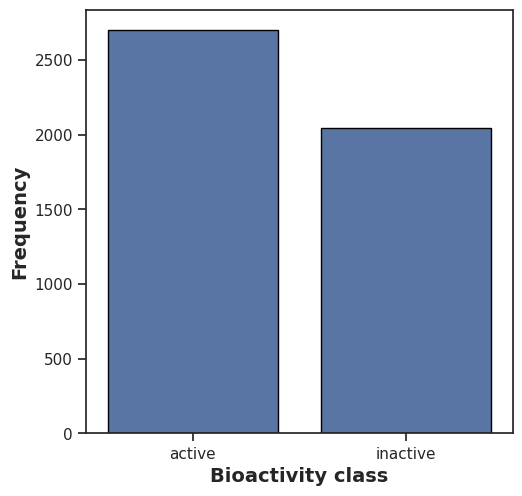

In [59]:
#frequency plot of the 2 bioactivity class
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df5, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

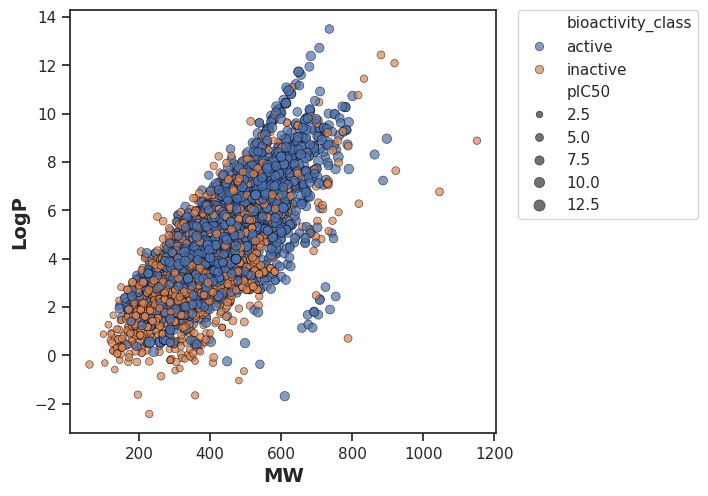

In [60]:
#scatter plot of MW vs LogP
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df5, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

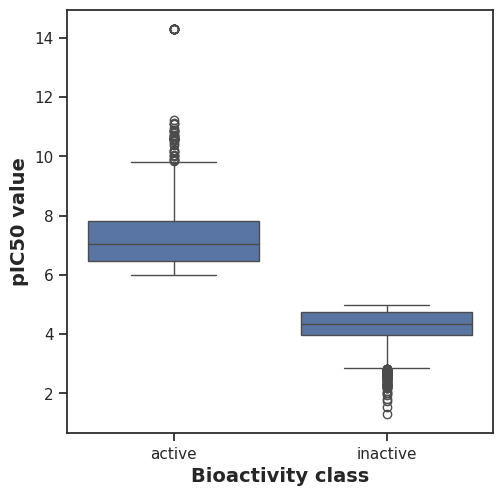

In [61]:
#box plots
#pIC50 value
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

#### **Statistical Analysis - Mann-Whitney U Test**

In [62]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  # Seed the random number generator
  seed(1)

  #active and inactive
  selection = [descriptor, 'bioactivity_class']
  df = df5[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df5[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

  #compare samples
  stat, p = mannwhitneyu(active, inactive)
  if verbose:
    print('Statistics=%.3f, p=%.3f' % (stat, p))

  # interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])

  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [63]:
mannwhitney('pIC50', verbose=False)

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,5533041.0,0.0,0.05,Different distribution (reject H0)


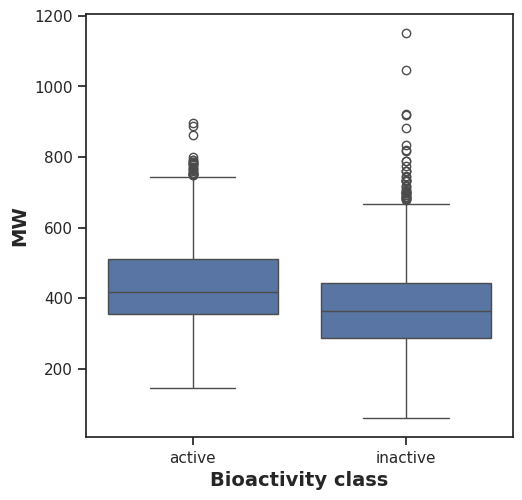

In [64]:
#MW
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [65]:
mannwhitney('MW', verbose=False)

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3581416.0,6.836462e-68,0.05,Different distribution (reject H0)


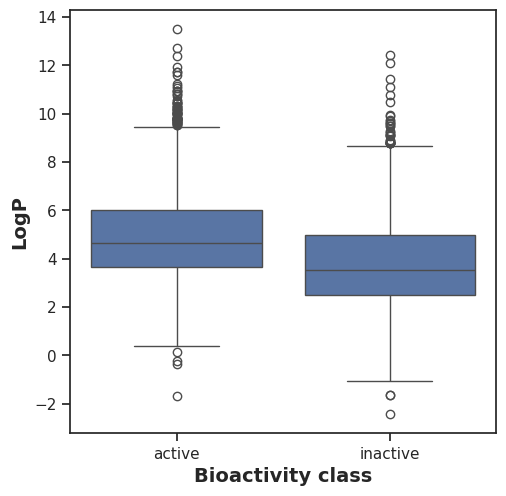

In [66]:
#LogP
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [67]:
mannwhitney('LogP', verbose=False)

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3704729.5,2.212268e-89,0.05,Different distribution (reject H0)


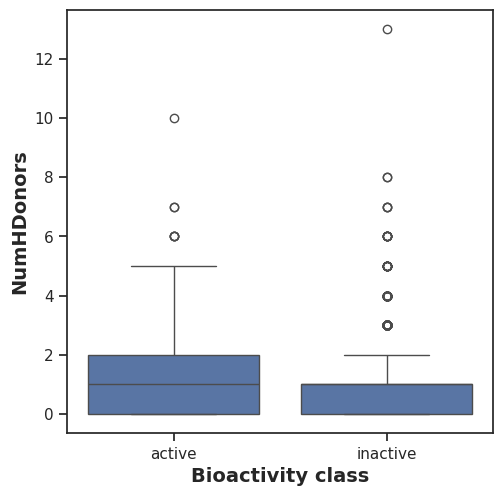

In [68]:
#NumHDonors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [69]:
mannwhitney('NumHDonors', verbose=False)

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3131739.5,2.570274e-16,0.05,Different distribution (reject H0)


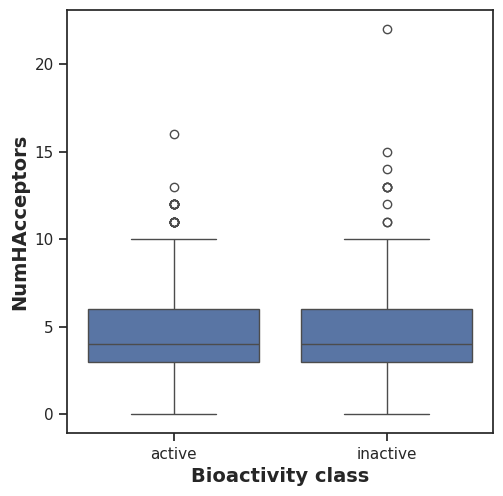

In [70]:
#NumHAcceptors
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [71]:
mannwhitney('NumHAcceptors', verbose=False)

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2979061.0,0.000004,0.05,Different distribution (reject H0)


**Interpretation of Statistical Results**

**Box Plots**

**pIC50 values**

Taking a look at pIC50 values, the actives and inactives displayed statistically significant difference, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

**Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited statistically significant difference between the actives and inactives.

### **PaDEL-Descriptor**

In [72]:
#download PaDEL-Descriptor
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2024-10-28 01:44:07--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-10-28 01:44:07--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   150MB/s    in 0.2s    

2024-10-28 01:44:07 (150 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-10-28 01:44:07--  https://github

In [73]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [74]:
df_final.head()

,molecule_chembl_id,bioactivity_class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,346.334,3.0953,0.0,6.0,6.096910


In [75]:
df_final.isna().sum()

,0
molecule_chembl_id,0
bioactivity_class,0
canonical_smiles,0
MW,0
LogP,0
NumHDonors,0
NumHAcceptors,0
pIC50,0


In [76]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df_final[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [77]:
! cat molecule.smi | head -5

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478


In [78]:
! cat molecule.smi | wc -l

6368


**Calculate fingerprint descriptors**

In [79]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [80]:
! bash padel.sh

Streaming output truncated to the last 5000 lines.
Processing CHEMBL590603 in molecule.smi (1370/6368). Average speed: 0.13 s/mol.
Processing CHEMBL270248 in molecule.smi (1371/6368). Average speed: 0.13 s/mol.
Processing CHEMBL271710 in molecule.smi (1372/6368). Average speed: 0.13 s/mol.
Processing CHEMBL271709 in molecule.smi (1373/6368). Average speed: 0.13 s/mol.
Processing CHEMBL26125 in molecule.smi (1374/6368). Average speed: 0.13 s/mol.
Processing CHEMBL407904 in molecule.smi (1375/6368). Average speed: 0.13 s/mol.
Processing CHEMBL248922 in molecule.smi (1376/6368). Average speed: 0.13 s/mol.
Processing CHEMBL239046 in molecule.smi (1377/6368). Average speed: 0.13 s/mol.
Processing CHEMBL272700 in molecule.smi (1378/6368). Average speed: 0.13 s/mol.
Processing CHEMBL269865 in molecule.smi (1379/6368). Average speed: 0.13 s/mol.
Processing CHEMBL271746 in molecule.smi (1381/6368). Average speed: 0.13 s/mol.
Processing CHEMBL271385 in molecule.smi (1380/6368). Average speed: 0.

In [81]:
! ls -l

total 190008
-rw-r--r-- 1 root root    526404 Oct 28 01:41 acetylcholineestrase_bioactivity_data_curated.csv
-rw-r--r-- 1 root root    468001 Oct 28 01:41 acetylcholineestrase_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root   5200159 Oct 28 01:41 acetylcholineestrase_bioactivity_data_raw.csv
-rw-r--r-- 1 root root    651475 Oct 28 01:43 acetylcholinesterase_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root    883933 Oct 28 01:43 acetylcholinesterase_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root  11331201 Oct 28 02:00 descriptors_output.csv
drwxr-xr-x 3 root root      4096 Oct 28 01:44 __MACOSX
-rw-r--r-- 1 root root       125 Oct 28 01:44 mannwhitneyu_LogP.csv
-rw-r--r-- 1 root root       124 Oct 28 01:44 mannwhitneyu_MW.csv
-rw-r--r-- 1 root root       133 Oct 28 01:44 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root       131 Oct 28 01:44 mannwhitneyu_NumHDonors.csv
-rw-r--r-- 1 root root       108 Oct 28 01:44 mannwhitneyu_pIC50.csv
-rwxr-xr-x 1 root 

**Preparing the X and Y Data Matrices**

In [82]:
df_x = pd.read_csv('descriptors_output.csv')
df_x.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df_x = df_x.drop(columns=['Name'])
df_x.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df_y = df_final['pIC50']
df_y.head()

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910


In [85]:
len(df_x), len(df_y)

(6368, 6368)

In [86]:
df_x = df_x.reset_index(drop=True)
df_y = df_y.reset_index(drop=True)
df6 = pd.concat([df_x, df_y], axis=1)
df6.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910


In [87]:
df6.isna().sum()

,0
PubchemFP0,0
PubchemFP1,0
PubchemFP2,0
PubchemFP3,0
PubchemFP4,0
...,...
PubchemFP877,0
PubchemFP878,0
PubchemFP879,0
PubchemFP880,0


In [88]:
df6.to_csv('acetylcholinesterase_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [89]:
#zip files
! zip -r results.zip . -i *.csv *.pdf

  adding: acetylcholinesterase_bioactivity_data_3class_pIC50_pubchem_fp.csv (deflated 96%)
  adding: plot_ic50.pdf (deflated 35%)
  adding: descriptors_output.csv (deflated 96%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: acetylcholineestrase_bioactivity_data_curated.csv (deflated 82%)
  adding: acetylcholineestrase_bioactivity_data_raw.csv (deflated 91%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: acetylcholinesterase_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: acetylcholinesterase_bioactivity_data_2class_pIC50.csv (deflated 75%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  add

In [90]:
!zip -r PaDEL-Descriptor.zip PaDEL-Descriptor/

  adding: PaDEL-Descriptor/ (stored 0%)
  adding: PaDEL-Descriptor/Descriptors.xls (deflated 78%)
  adding: PaDEL-Descriptor/MACCSFingerprinter.xml (deflated 84%)
  adding: PaDEL-Descriptor/descriptors.xml (deflated 84%)
  adding: PaDEL-Descriptor/GraphOnlyFingerprinter.xml (deflated 84%)
  adding: PaDEL-Descriptor/ExtendedFingerprinter.xml (deflated 84%)
  adding: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml (deflated 84%)
  adding: PaDEL-Descriptor/license/ (stored 0%)
  adding: PaDEL-Descriptor/license/lgpl-2.1.txt (deflated 65%)
  adding: PaDEL-Descriptor/license/lgpl.license (deflated 65%)
  adding: PaDEL-Descriptor/license/LICENSE.txt (deflated 66%)
  adding: PaDEL-Descriptor/license/README - CDK (deflated 54%)
  adding: PaDEL-Descriptor/AtomPairs2DFingerprintCount.xml (deflated 84%)
  adding: PaDEL-Descriptor/EStateFingerprinter.xml (deflated 84%)
  adding: PaDEL-Descriptor/KlekotaRothFingerprinter.xml (deflated 84%)
  adding: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml (d

### **Building Regression Model**

In [91]:
#importing required library for the model building
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import r2_score, mean_squared_error

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [92]:
#input features
x = df6.drop('pIC50', axis=1)

#output feature
y = df6.pIC50

In [93]:
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6364,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6365,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6366,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [94]:
y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
6363,6.795880
6364,5.100000
6365,4.000000
6366,4.200000


In [95]:
x.shape, y.shape

((6368, 881), (6368,))

In [96]:
def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

x = remove_low_variance(x, threshold=0.1)
x

,PubchemFP3,PubchemFP12,PubchemFP13,PubchemFP15,PubchemFP16,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP33,PubchemFP37,...,PubchemFP758,PubchemFP761,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,1,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6363,0,1,0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6364,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6365,0,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
6366,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [97]:
x.to_csv('descriptor_list.csv', index = False)

In [98]:
#split the data - 80:20
# Set seed for reproducibility

# Split the data with a random state for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [99]:
x_train.shape, y_train.shape

((5094, 221), (5094,))

In [100]:
x_test.shape, y_test.shape

((1274, 221), (1274,))

In [101]:
# #random forest model
# model = RandomForestRegressor(random_state=123)

In [102]:
# # Hyperparameter tuning using GridSearchCV
# param_grid = {
#         'n_estimators': [100, 200, 300],
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5, 10]
#     }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(x_train, y_train)

In [103]:
# # Best model
# best_model = grid_search.best_estimator_
# # Make predictions
# y_pred = best_model.predict(x_test)

In [104]:
# # Show performance
# print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

In [105]:
# print(f"R2 Score: {r2_score(y_test, y_pred)}")

In [106]:
# import pickle
# # Save the best model to a pickle file
# with open('randomforest_model.pkl', 'wb') as f:
#     pickle.dump(best_model, f)

**Scatter Plot of Experimental vs Predicted pIC50 Value**

In [107]:
# sns.set(color_codes=True)
# sns.set_style("white")

# # Fix: explicitly specify x and y
# ax = sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})

# ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
# ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
# ax.set_xlim(0, 12)
# ax.set_ylim(0, 12)
# ax.figure.set_size_inches(5, 5)
# plt.show()


**Compare Regression Models**

In [108]:
import pickle

# Dictionary to store results
model_results = {}

# List of models to compare
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

# Hyperparameter tuning using GridSearchCV
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10, 15]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10, 15]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [-1, 10, 20, 30],  # LightGBM uses -1 for no limit on depth
        'min_child_samples': [20, 50, 100]
    }
}

best_model = None
best_r2 = float('-inf')  # To track the best R² score

# Iterate through models and collect their performance
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)

    # Get the best model and its predictions
    best_estimator = grid_search.best_estimator_
    y_pred = best_estimator.predict(x_test)

    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Store results
    model_results[model_name] = {'R²': r2, 'RMSE': rmse}

    # Update the best model if the current model has a better R² score
    if r2 > best_r2:
        best_r2 = r2
        best_model = best_estimator

# Print the comparison
for model_name, metrics in model_results.items():
    print(f"{model_name}: R² = {metrics['R²']}, RMSE = {metrics['RMSE']}")

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(model_results).T

# Save the best model to a pickle file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"Best model saved: {best_model}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 442
[LightGBM] [Info] Number of data points in the train set: 5094, number of used features: 221
[LightGBM] [Info] Start training from score 5.845756
Random Forest: R² = 0.5807990154787557, RMSE = 1.0332328575729024
Gradient Boosting: R² = 0.5318676065328942, RMSE = 1.0918711945623483
XGBoost: R² = 0.5702842236712744, RMSE = 1.0461108604179459
LightGBM: R² = 0.5844100369339391, RMSE = 1.0287730688714025
Best model saved: LGBMRegressor(max_depth=10, n_estimators=200)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [109]:
# Create a DataFrame to display results as a table
results_df = pd.DataFrame(model_results).T
results_df = results_df.reset_index().rename(columns={'index': 'Model', 'R²': 'R2', 'RMSE': 'RMSE'})
results_df = results_df.sort_values(by='R2', ascending=False)

# Display the table
results_df

,Model,R2,RMSE
3,LightGBM,0.584410,1.028773
0,Random Forest,0.580799,1.033233
2,XGBoost,0.570284,1.046111
1,Gradient Boosting,0.531868,1.091871


**Data Visualization of model performance**

<ipython-input-110-f59fff444b77>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R2', y='Model', data=results_df_sorted, palette='viridis')


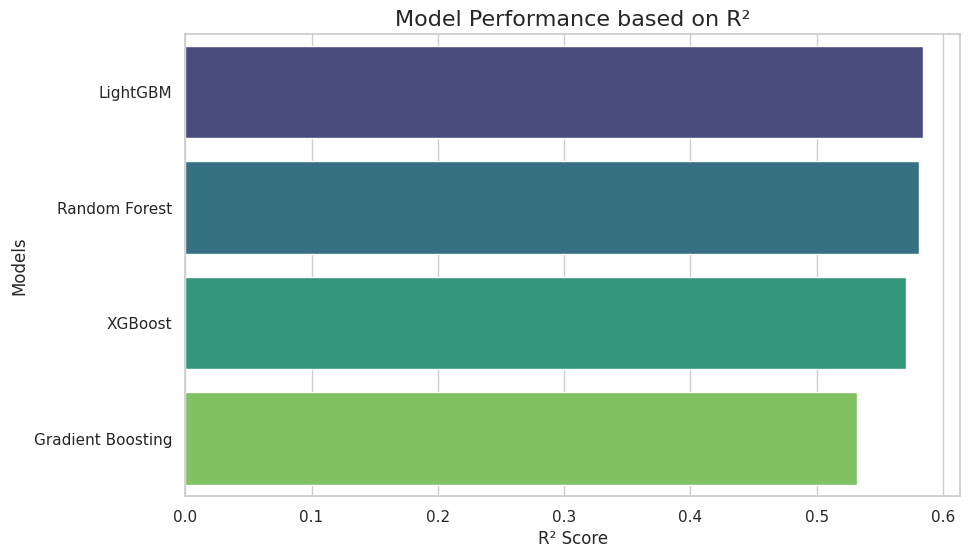

In [110]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Sort the results based on R2 values for better visualization
results_df_sorted = results_df.sort_values(by='R2', ascending=False)

# Create a bar plot for model performance based on R2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x='R2', y='Model', data=results_df_sorted, palette='viridis')

# Add titles and labels
plt.title('Model Performance based on R²', fontsize=16)
plt.xlabel('R² Score', fontsize=12)
plt.ylabel('Models', fontsize=12)

# Show the plot
plt.show()

<ipython-input-111-4ad9f305fbc6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df_sorted, palette='viridis')


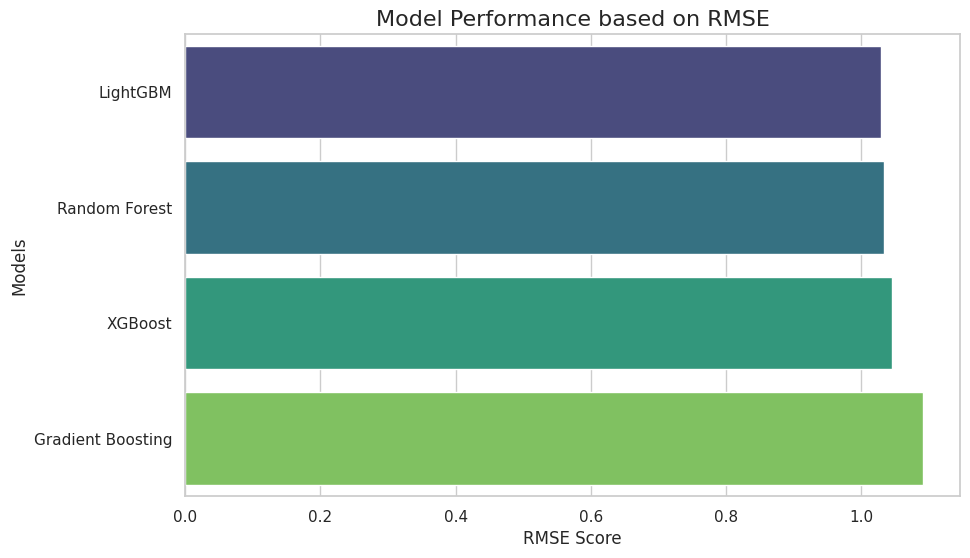

In [111]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Sort the results based on RMSE values for better visualization
results_df_sorted = results_df.sort_values(by='RMSE', ascending=True
                                           )

# Create a bar plot for model performance based on R2 scores
plt.figure(figsize=(10, 6))
sns.barplot(x='RMSE', y='Model', data=results_df_sorted, palette='viridis')

# Add titles and labels
plt.title('Model Performance based on RMSE', fontsize=16)
plt.xlabel('RMSE Score', fontsize=12)
plt.ylabel('Models', fontsize=12)

# Show the plot
plt.show()